# Projeto 2

Aluno: André Soranzzo Mota RA: 166404

Aluna: Rebecca Moreira Messias RA: 186416

# 1. Objetivos

Este trabalho visa aplicar métodos de aprendizagem para resolver tarefas de classificação e regressão. Em cada tarefa, deve-se utilizar as métricas e métodos de aprendizagem apropriados.

## 1.1 Importação e instalação de bibliotecas

As bibliotecas utilizadas neste projeto foram: 
- **numpy**: manipular arrays
- **pandas**: manipular os dados
- **matplotlib**: plotar os gráficos
- **time**: cálculo do tempo de funções
- **sklearn**: redução de dimensionalidade e normalização dos dados
- **math**: cálculo de operações matemáticas
- **mpl_toolkits**: plotar em três dimensões (3d)

In [21]:
!pip install umap

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

from mpl_toolkits.mplot3d import axes3d
from sklearn.utils import shuffle
from math import sqrt

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=308bd7b7b58f16c3c24ff5b58be1f7d7f62a8e7fc23233219b8df21f81ab3d29
  Stored in directory: c:\users\andre\appdata\local\pip\cache\wheels\d4\13\91\2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


## 1.2 Dados

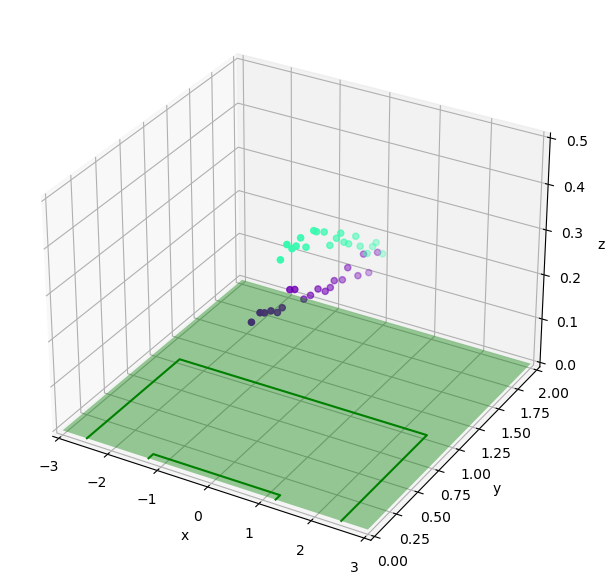

In [22]:
kick1 = pd.read_table('kick1.dat', delimiter=' ', names=['x', 'y','z'])
kick2 = pd.read_table('kick2.dat', delimiter=' ', names=['x', 'y','z'])

fig = plt.figure(figsize=(10, 7.5), dpi=100)

ax = plt.axes(projection="3d")
ax.scatter3D(kick1.x, kick1.y, kick1.z, c='#7000b5');
ax.scatter3D(kick2.x, kick2.y, kick2.z, c='#37faaf');

X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-3, 3)
ax.set_ylim(0 ,2)
ax.set_zlim(0, 0.5)

plt.show()

# 2. Parte 1 - Regressão

Considere que você é um goleiro em uma partida de futebol robótico na RoboCup Teen Size League. Seu oponente vai chutar
uma bola contra você. Seu objetivo é prever a posição da bola para interceptá-la, ou seja, defender seu gol.
goleiro, está em x = 0, y = 0. O trabalho consiste na implementação de uma regressão linear e polinomial para prever a trajetória da bola. São dados dois conjuntos de dados: kick1 e kick2. Eles representam duas trajetórias diferentes para a bola. Deve-se aprender o melhor modelo para ajustar os dados.

In [23]:
kick_data = []

X = kick1.x.values
Y = kick1.y.values
Z = kick1.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

X = kick2.x.values
Y = kick2.y.values
Z = kick2.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

### Stochastic Gradient Descent

(explicação)

In [24]:
def stochasticGradientDescent(X_b, y, lr='opt', eta0=0.001, n_epochs=50, tol=0.0005):
    m = X_b.shape[0] 
    #   cost = np.zeros(n_epochs)
    cost = []
    X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] 
    #   theta = np.random.rand(X_b.shape[1])
    theta = np.zeros(X_b.shape[1])
    
#     X_b, y = shuffle(X_b, y)
    cost_func = 100000
    for epoch in range(n_epochs):
        if cost_func < tol:
            break

        for i in range(m):
            xi = X_b[i: i+1]
            yi = y[i: i+1]

            # calculate its gradient
            loss = xi[0].dot(theta) - yi
            gradients = xi.T.dot(loss)
            
    #       print(xi[0].dot(theta))
    #       print('loss: ', loss, ' xi: ', xi, ' grad: ', gradients)
    #       gradients = xi[0].T * loss

            alpha = eta0
            # update parameters
#             if(lr == 'opt'):
#                 alpha = 1.0 * eta0 / (1 + np.log(epoch+1))

            theta = theta - alpha * gradients

        # calculate the cost function
        cost_func = (loss ** 2)/2
        cost.append(cost_func)

    return theta, cost

### Batch Gradient Descent

(explicação)

In [25]:
def gradientDescent(X_b, y, lr='opt', eta0=0.005, n_epochs=50, tol=0.01):
    m = X_b.shape[0] 
    cost = []
    X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] 
    theta = np.zeros(X_b.shape[1])
    #     theta = np.random.rand(X_b.shape[1])
    X_b, y = shuffle(X_b, y)
    cost_func = 100000
    for epoch in range(n_epochs):
        if cost_func < tol:
            break
    
        # calculate its gradient
        loss = X_b.dot(theta) - y
        gradients = X_b.T.dot(loss) / m
        
        alpha = eta0
      # update parameters
#         if(lr == 'opt'):
#             alpha = 1.0 * eta0 / (10 + m * (epoch/25 + 10))
        
        theta = theta - alpha * gradients
      
        #calculate the cost function
        cost_func = (np.sum(loss) ** 2)/2
        cost.append(cost_func)
 
    return theta, cost

## 2.1. Algoritmo de Regressão Linear

In [26]:
t = np.linspace(1, 5, 20)
t = np.c_[t, t**2]
t

array([[ 1.        ,  1.        ],
       [ 1.21052632,  1.46537396],
       [ 1.42105263,  2.01939058],
       [ 1.63157895,  2.66204986],
       [ 1.84210526,  3.3933518 ],
       [ 2.05263158,  4.2132964 ],
       [ 2.26315789,  5.12188366],
       [ 2.47368421,  6.11911357],
       [ 2.68421053,  7.20498615],
       [ 2.89473684,  8.37950139],
       [ 3.10526316,  9.64265928],
       [ 3.31578947, 10.99445983],
       [ 3.52631579, 12.43490305],
       [ 3.73684211, 13.96398892],
       [ 3.94736842, 15.58171745],
       [ 4.15789474, 17.28808864],
       [ 4.36842105, 19.08310249],
       [ 4.57894737, 20.966759  ],
       [ 4.78947368, 22.93905817],
       [ 5.        , 25.        ]])

### 2.1.1 Regressão Linear com Stochastic Gradient Descent

In [27]:
n_epochs = 10000
tol = 1e-6

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = stochasticGradientDescent(x, y, eta0=0.005, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['SGD'] = theta
        kick_data[i][dim]['linear_model']['cost']['SGD'] = cost

---------
Kick:  1  | index:  0
  training:  X
  - time of training linear regression with SGD:  0.03101968765258789
  - minimun cost:  [9.67498743e-07]
  - num of iterations:  166

  training:  Y
  - time of training linear regression with SGD:  0.07600092887878418
  - minimun cost:  [9.8593859e-07]
  - num of iterations:  348

  training:  Z
  - time of training linear regression with SGD:  1.7159843444824219
  - minimun cost:  [2.08157426e-05]
  - num of iterations:  10000

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  1.730001449584961
  - minimun cost:  [4.83923294e-06]
  - num of iterations:  10000

  training:  Y
  - time of training linear regression with SGD:  0.06899189949035645
  - minimun cost:  [9.8593859e-07]
  - num of iterations:  348

  training:  Z
  - time of training linear regression with SGD:  1.7489941120147705
  - minimun cost:  [0.00071906]
  - num of iterations:  10000



### 2.1.2 Função de Custo com Stochastic Gradient Descent

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


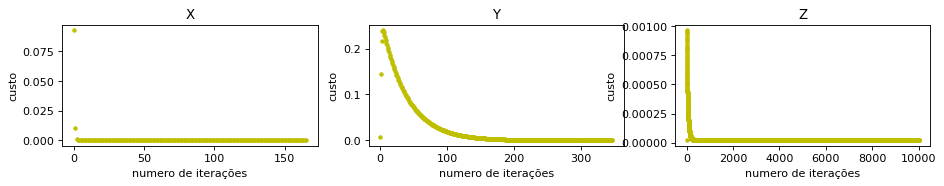

---------
Kick:  2  | index:  1


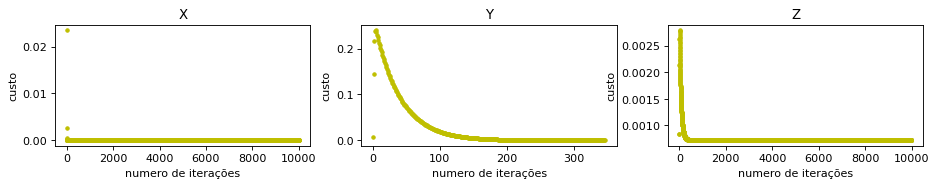

In [28]:
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['SGD'], "y.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

### 2.1.3 Regressão Linear com Batch Gradient Descent

In [29]:
n_epochs = 100000
tol = 1e-6
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = gradientDescent(x, y, eta0=0.005, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['GD'] = theta
        kick_data[i][dim]['linear_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  0.10700082778930664
- minimun cost:  9.997183486863413e-07
- num of iterations:  6731

training:  Y
- time of training linear regression with GD:  0.24500608444213867
- minimun cost:  9.99932407149021e-07
- num of iterations:  12763

training:  Z
- time of training linear regression with GD:  0.1580030918121338
- minimun cost:  9.997440904207505e-07
- num of iterations:  8272

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  0.007006406784057617
- minimun cost:  3.986386040332669e-08
- num of iterations:  88

training:  Y
- time of training linear regression with GD:  0.24500417709350586
- minimun cost:  9.99932407149021e-07
- num of iterations:  12763

training:  Z
- time of training linear regression with GD:  0.15099239349365234
- minimun cost:  9.98984500653968e-07
- num of iterations:  8209



### 2.1.4 Função de Custo com Batch Gradient Descent

Batch Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


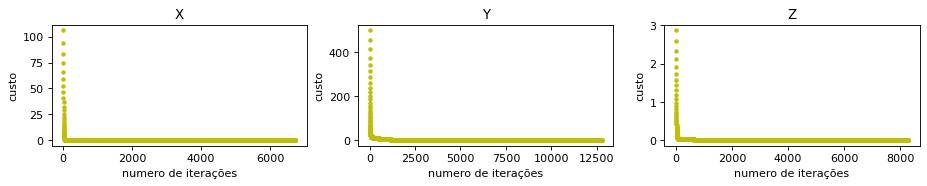

---------
Kick:  2  | index:  1


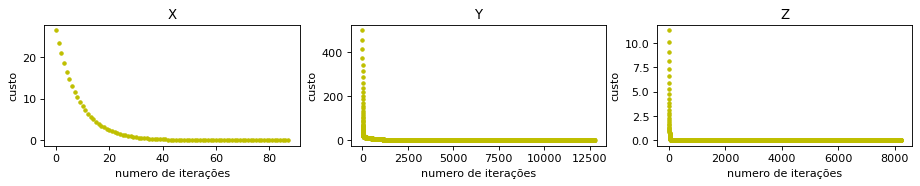

In [30]:
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['GD'], "y.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## 2.2. Algoritmo de Regressão Polinomial

### 2.2.1 Regressão Polinomial com Stochastic Gradient Descent

In [31]:
n_epochs = 10000
tol = 1e-6

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        x = t[:,0] if dim == 'Y' else t
        y = kick_data[i][dim]['data']    
        starter_time = time.time()
        theta, cost = stochasticGradientDescent(x, y, eta0=7.5e-4, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polynomial_model']['theta']['SGD'] = theta
        kick_data[i][dim]['polynomial_model']['cost']['SGD'] = cost

---------
Kick:  1  | index:  0
  training:  X
  - time of training linear regression with SGD:  0.04499459266662598
  - minimun cost:  [9.32822772e-07]
  - num of iterations:  217

  training:  Y
  - time of training linear regression with SGD:  0.42499375343322754
  - minimun cost:  [9.85657258e-07]
  - num of iterations:  2461

  training:  Z
  - time of training linear regression with SGD:  0.03900027275085449
  - minimun cost:  [9.73540001e-07]
  - num of iterations:  229

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  0.031002521514892578
  - minimun cost:  [8.77889015e-07]
  - num of iterations:  157

  training:  Y
  - time of training linear regression with SGD:  0.43801045417785645
  - minimun cost:  [9.85657258e-07]
  - num of iterations:  2461

  training:  Z
  - time of training linear regression with SGD:  1.671999216079712
  - minimun cost:  [0.00017295]
  - num of iterations:  10000



### 2.2.2 Função de Custo com Stochastic Gradient Descent

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


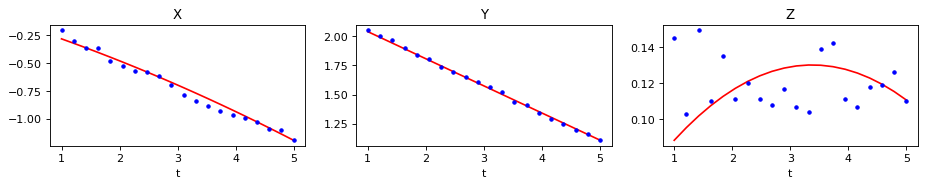

---------
Kick:  2  | index:  1


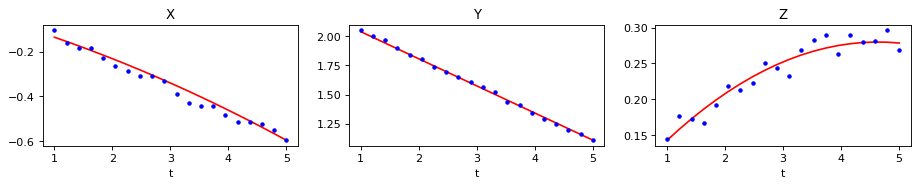

In [32]:
%matplotlib inline

t_line = np.linspace(1, 5, 20)
t_line = np.c_[t_line, t_line**2]
t_line = np.c_[np.ones((t_line.shape[0], 1)), t_line] 

print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    
    X_pol = t_line.dot(kick_data[i]['X']['polynomial_model']['theta']['SGD'])
    Y_pol = t_line[:,:2].dot(kick_data[i]['Y']['polynomial_model']['theta']['SGD'])
    Z_pol = t_line.dot(kick_data[i]['Z']['polynomial_model']['theta']['SGD'])

    ax = plt.subplot(1, 3, 1)
    ax.plot(t_line[:,1],X_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['X']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('X')
    
    ax = plt.subplot(1, 3, 2)
    ax.plot(t_line[:,1],Y_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['Y']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('Y')
    
    ax = plt.subplot(1, 3, 3)
    ax.plot(t_line[:,1],Z_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['Z']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('Z')
    plt.show()

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


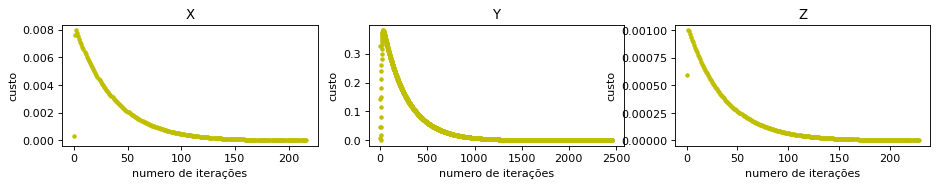

---------
Kick:  2  | index:  1


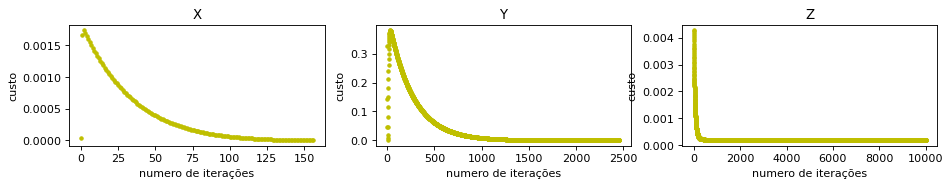

In [33]:
%matplotlib inline
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polynomial_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polynomial_model']['cost']['SGD'], "y.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

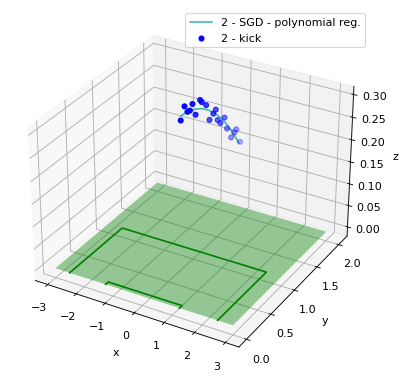

In [34]:
%matplotlib inline

fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")

# ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9', label="1 - kick")

# kick two
ax.scatter3D(kick2.x, kick2.y, kick2.z, c='#0000fa', label="2 - kick")

ax.plot(
    X_pol, 
    Y_pol, 
    Z_pol, 
    c='#10a9a9', 
    label='2 - SGD - polynomial reg.', 
    alpha=0.8
)

ax.legend()

# field
X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# ax.set_xlim(-3, 3)
# ax.set_ylim(0 ,2)
# ax.set_zlim(0, 0.5)

plt.show()

### 2.2.3 Regressão Polinomial com Batch Gradient Descent

In [35]:
n_epochs = 50000
tol = 1e-5
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        x = t[:,0] if dim == 'Y' else t
        y = kick_data[i][dim]['data']
        starter_time = time.time()
        theta, cost = gradientDescent(x, y, eta0=5e-3, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polynomial_model']['theta']['GD'] = theta
        kick_data[i][dim]['polynomial_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  0.01801586151123047
- minimun cost:  9.919056559232833e-06
- num of iterations:  801

training:  Y
- time of training linear regression with GD:  0.17099666595458984
- minimun cost:  9.988245579236246e-06
- num of iterations:  10992

training:  Z
- time of training linear regression with GD:  0.47500061988830566
- minimun cost:  9.999437086327913e-06
- num of iterations:  24520

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  0.022998809814453125
- minimun cost:  9.935764062779062e-06
- num of iterations:  795

training:  Y
- time of training linear regression with GD:  0.21999359130859375
- minimun cost:  9.988245579236246e-06
- num of iterations:  10992

training:  Z
- time of training linear regression with GD:  0.022994518280029297
- minimun cost:  9.893597895709215e-06
- num of iterations:  1204



### 2.2.4 Função de Custo com Stochastic Gradient Descent

Batch Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


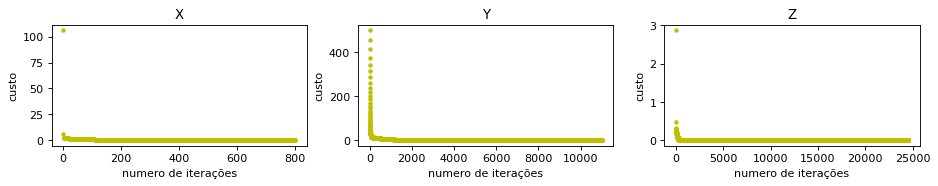

---------
Kick:  2  | index:  1


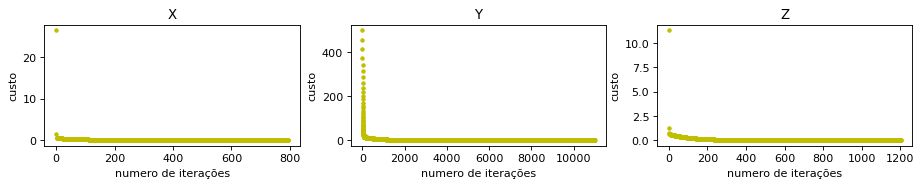

In [36]:
%matplotlib inline
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polynomial_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polynomial_model']['cost']['GD'], "y.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## 2.3 Validação do Modelo

In [37]:
def predictModel(X, Y, theta):
    X = np.c_[np.ones((X.shape[0], 1)), X] 
    predict_values = X.dot(theta)
    return predict_values

def meanSquaredError(Y_predicted, Y):
    error = 0
    m = len(Y_predicted)
    for i in range(m):
        error += ((Y_predicted[i] - Y[i])**2)
    return error/m

In [38]:
# t_line = np.linspace(1, 5, 20)
t_line = np.arange(1,20,0.05)
t_line = np.c_[t_line, t_line**2]

Kick_Model = []

for i in range(2):
    Kick_Model.append({
        'X' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polynomial_model']['theta']['GD'])
            }
        },
        'Y' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['polynomial_model']['theta']['GD'])
            }
        },
        'Z' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polynomial_model']['theta']['GD'])
            }
        }
    })

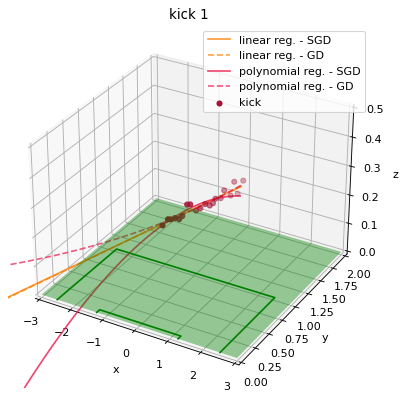

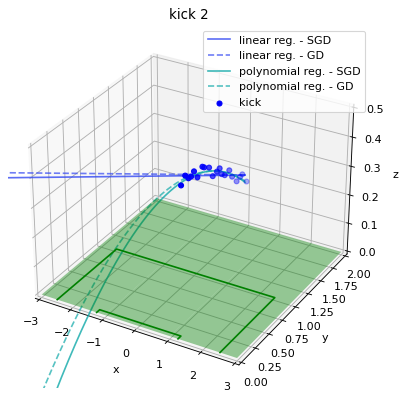

In [39]:
%matplotlib inline

color_schema = [
    {
        'points' : '#a51134',
        'linear' : '#ff7f00',
        'polynomial' : '#eb184a'
    },
    {
        'points' : '#0000fa',
        'linear' : '#3348f2',
        'polynomial' : '#10a9a9'
    }
]

for i in range(2):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = plt.axes(projection="3d")
    
    # plot kick data
    ax.scatter3D(
        kick_data[i]['X']['data'], 
        kick_data[i]['Y']['data'], 
        kick_data[i]['Z']['data'],
        c=color_schema[i]['points'], 
        label="kick"
    )
    
    # plot linear model
    ax.plot3D(
        Kick_Model[i]['X']['linear_model']['SGD'], 
        Kick_Model[i]['Y']['linear_model']['SGD'], 
        Kick_Model[i]['Z']['linear_model']['SGD'], 
        c=color_schema[i]['linear'], 
        label='linear reg. - SGD', 
        alpha=0.8
    )
    ax.plot3D(
        Kick_Model[i]['X']['linear_model']['GD'], 
        Kick_Model[i]['Y']['linear_model']['GD'], 
        Kick_Model[i]['Z']['linear_model']['GD'], 
        '--',
        c=color_schema[i]['linear'], 
        label='linear reg. - GD', 
        alpha=0.7
    )
    
    #plot polynomial model
    ax.plot3D(
        Kick_Model[i]['X']['polynomial_model']['SGD'], 
        Kick_Model[i]['Y']['polynomial_model']['SGD'], 
        Kick_Model[i]['Z']['polynomial_model']['SGD'], 
        c=color_schema[i]['polynomial'], 
        label='polynomial reg. - SGD', 
        alpha=0.8
    )
    ax.plot3D(
        Kick_Model[i]['X']['polynomial_model']['GD'], 
        Kick_Model[i]['Y']['polynomial_model']['GD'], 
        Kick_Model[i]['Z']['polynomial_model']['GD'], 
        '--',
        c=color_schema[i]['polynomial'], 
        label='polynomial reg. - GD', 
        alpha=0.7
    )

    # ax.plot(X_pol, Z_pol, zdir='y', zs=2, alpha=.25, c='k')
    # ax.plot(Y_pol, Z_pol, zdir='x', zs=-3, alpha=.25, c='k')
    # ax.plot(X_pol, Y_pol, zdir='z', zs=0, alpha=.25, c='k')

    ax.legend()

    # field
    X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
    Z_field = np.zeros(X_field.shape)
    ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
    ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
    ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(-3, 3)
    ax.set_ylim(0 ,2)
    ax.set_zlim(0, 0.5)
    
    title = 'kick ' + str(i+1)
    ax.set_title(title)

    plt.show()

# 3. Parte 2 - Classificação

Na segunda parte deve-se resolver uma tarefa de classificação usando métodos de aprendizagem supervisionada. Iremos empregar o conjunto de dados de reconhecimento de dígitos manuscritos com base na caneta. É um banco de imagens simples e conhecido para reconhecimento de imagens. Consiste em imagens em escala de cinza de 8 por 8 pixels divididas em 10 classes de dígitos. Uma descrição completa pode ser encontrada no link: archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits.


In [40]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

%matplotlib inline

In [41]:
digits = load_digits()

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

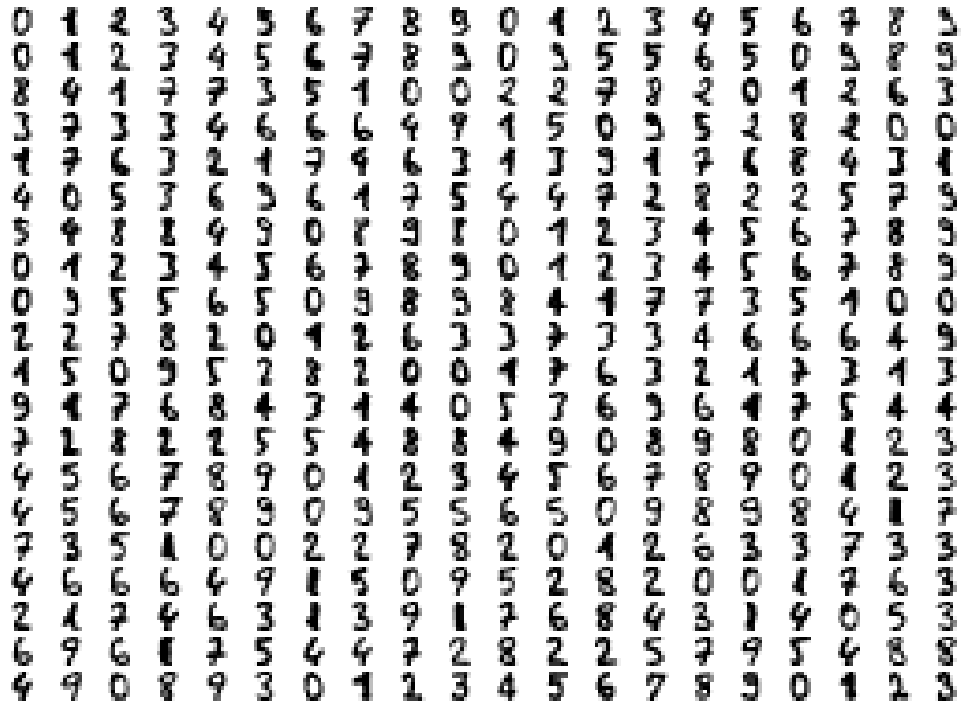

In [42]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

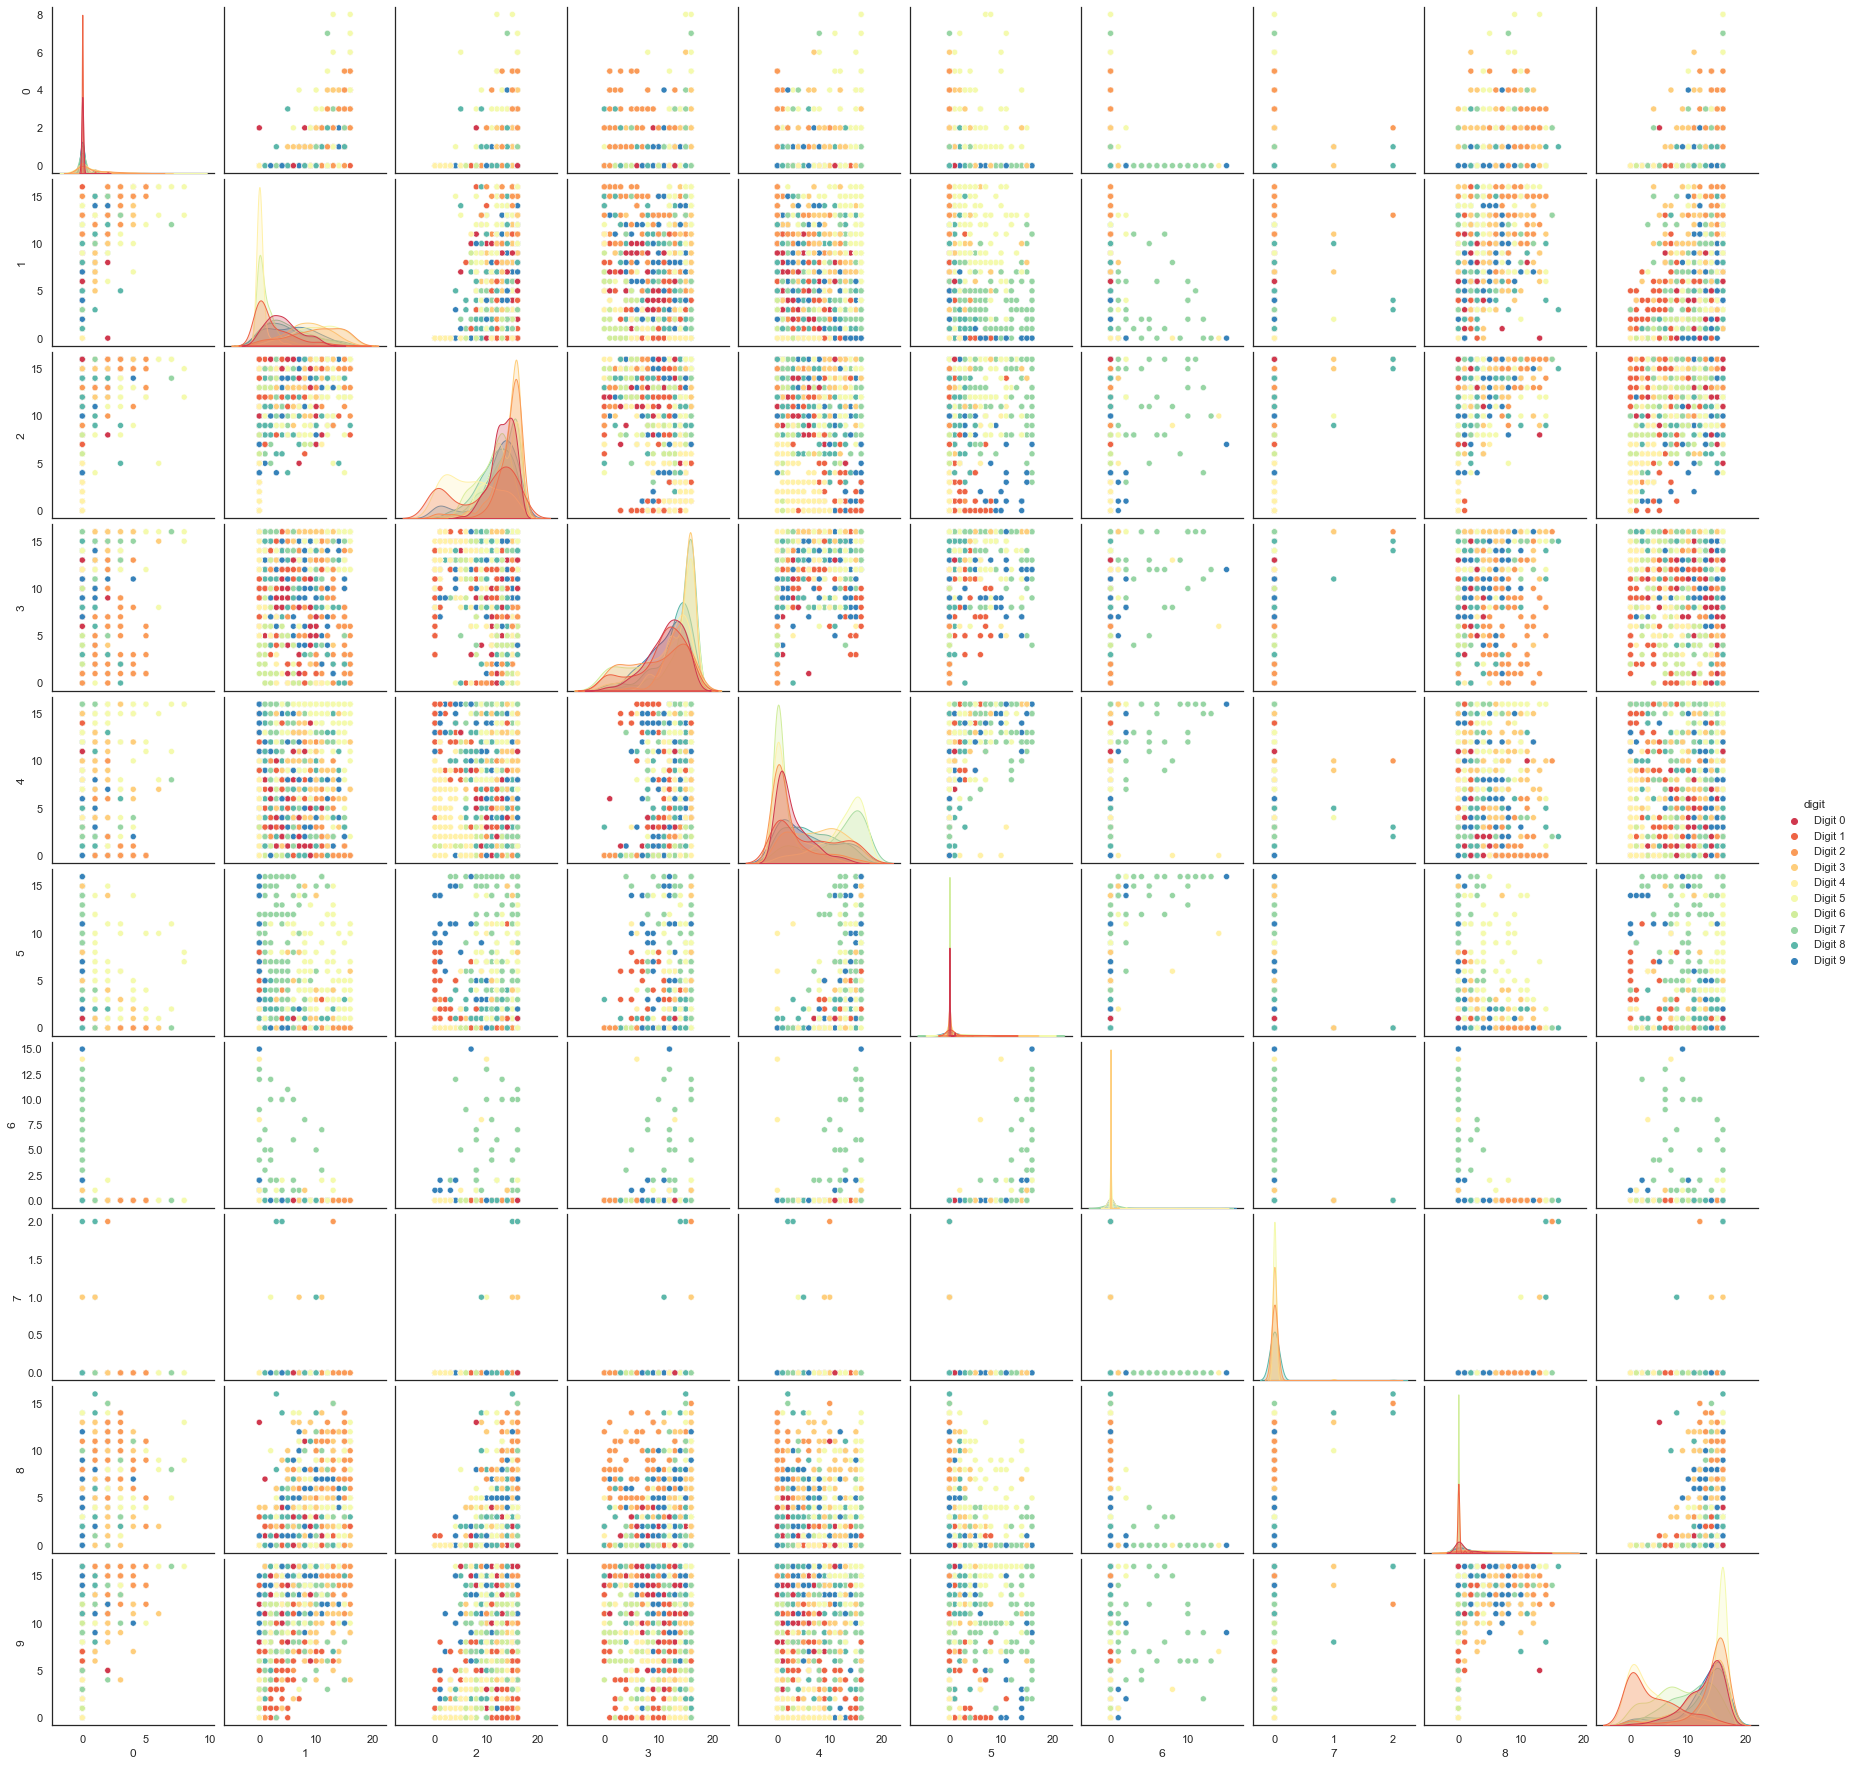

In [43]:
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral')

In [44]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
from io import BytesIO
from PIL import Image
import base64

In [ ]:
def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

In [ ]:
digits_df = pd.DataFrame(embedding, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digits.target]
digits_df['image'] = list(map(embeddable_image, digits.images))

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in digits.target_names],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)